# Introduction to Machine Learning

### August 12, 2020 | Week 4 Day 3
### Instructor: Monique Wong


## Agenda
1. Machine Learning
    - Supervised vs. Unsupervised Learning
* Supervised Learning 101
    - `X` and `y`
    - Review: Regression vs. Classification
    - The golden rule: train/test split
    - Types of errors, bias-variance tradeoff
* Linear Regression: Simple vs. Multiple Linear Regression, Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Machine Learning: Supervised Learning
- In supervised learning, we have a set of observations (__*X*__) with an associated response (__*y*__)
- We wish to find a model function that relates __*X*__ to __*y*__
- Then use that model function to predict future observations

<img src='imgs/sup_learning.png' width="700">

## Machine Learning: Unsupervised Learning
- We have __*X*__ (the data) but no __*y*__ (associated response)

<img src='imgs/unsup_learning.png' width="630">

## Supervised vs Unsupervised questions

Which of these are examples of supervised learning?

1. Finding groups of similar properties in a real estate data set.
2. Predicting real estate prices based on house features like number of rooms, learning from past sales as examples.
3. Identifying groups of animals given features such as "number of legs", "wings/no wings", "fur/no fur", etc.
4. Detecting credit card fraud based on examples of fraudulent transactions.


## Supervised Learning 101

Lots of terminology!

For tabular data:
- **examples** = rows = samples = records = instances (usually denoted by $n$)
- **features** = inputs = predictors = explanatory variables = regressors = independent variables = covariates (usually denoted by $d$) = **X**
- **targets** = outputs = outcomes = response variable = dependent variable = labels (if categorical) = **y**
- **training** = learning = fitting

## Let's load some data

In [2]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

stock_df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
stock_df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


## Splitting out our X and y
- **Review**: In this case, are we working with a classification or regression problem?

In [3]:
X = stock_df[['Interest_Rate','Unemployment_Rate']]
y = stock_df['Stock_Index_Price']

In [6]:
X.head()
#y.head()

,Interest_Rate,Unemployment_Rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


## The golden rule
- When you're doing machine learning, now that you've identified **X** and **y**
- BEFORE YOU DO ANYTHING ELSE...
- **Including** exploratory data analysis, visualization etc.
- **You need to split your data into train and test**
- **You only work with the training data**

### Why?
- As soon as you start making decisions on what features to include, drop etc., you are letting a part of the test data influence your decision-making
- Your results will not be truly representative of "unseen data"

## So... how do we split?
- Most common way is to `train_test_split` in `sklearn`
- Shuffles the data first and then split it
- 80/20, 75/25, 70/30 are common splits

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train.shape

(19,)

In [11]:
x_test.shape

(5,)

## The big picture
- We train using the **training data**
- We test what is learned by the model on the **test data**
- We have two scores: **training** vs. **test**

### Which matters more?
- It doesn't matter how good our **training score** is because the **test score is what matters**
- Good models that generalize well though will have **similar training and testing scores**

**We want to pick models that generalize well to unseen data**

## The fundamental tradeoff (part 1)
(aka the bias-variance tradeoff)

| Model | Training Score relative to Test Score | Performance |
|:-|:-|:-|
|Complex|High training score compared to test score| Overfit |
|Simple|Low training score and low test score|Underfit|

- Models that have **extremely high training scores** (that are too good to be true) that are **highly complex** that learned very complex relationships in the training data **can be overfit**
- On the other hand, models that have **low training scores** that are **very simple** may not have learned the necessary relationships in the training data needed to predict well on unseen data; they are **underfit**

## Minimizing approximation error ...
... means that our model generalizes well

$E_{test} = E_{approx} + E_{train}$

$E_{approx} = (E_{test} - E_{train})$

- There is generally a "trade-off" between complexity and test error
- A more complex model will fit closer to the peculiarities of the training data
- i.e., $E_{approx}$ tends to get bigger as our model becomes more complex
- This means it will likely not generalise well to new data!
- $E_{approx}$ tends to get smaller with more data

## The fundamental tradeoff (part 2)
... In the "bias-variance" language

- **The bias error** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- **The variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

Source: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

# Break

Reconvene at 11:10am PT

## Linear Regression
- Used as a predictive model
- Assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate, **y**) and the independent variable/s (input variable/s used in the prediction, **X**)

### Let's start with **simple** linear regression
- Only one independent/input variable is used to predict the dependent variable.

## Simple Linear Regression

$$Y = C + M*X$$

$Y$ = Dependent variable (output/outcome/prediction/estimation)

$C$ = Constant (y-intercept)

$M$ = Slope of the regression line (the effect that X has on Y)

$X$ = Independent variable (input variable used in the prediction of Y)

## Multiple Linear Regression
- Many $X$ and $M$

$$Y = C + M_1X_1 + M_2X_2 + M_3X_3 ...$$

- The higher the M is, the more influence the relevant X has on the variable Y

## Matrix representation

- $\hat{y}$ is the linear function of features $x$ and weights $w$. 

$$\hat{y} = w^Tx + b$$
        
- $\hat{y} \rightarrow$ prediction
- $w \rightarrow$ weight vector
- $b \rightarrow$ bias
- $x \rightarrow$ features

$$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d\end{bmatrix} + b$$

## Let's try it!
Remembering our dataset...

In [12]:
import statsmodels.api as sm

In [13]:
X_train.head()

,Interest_Rate,Unemployment_Rate
8,2.25,5.5
7,2.25,5.5
22,1.75,6.2
15,1.75,6.1
19,1.75,6.1


In [14]:
y_train.head()

8     1159
7     1195
22     704
15     958
19     866
Name: Stock_Index_Price, dtype: int64

## Fitting a linear model
- Let's look at the results

In [16]:
X_train = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train).fit()
model.summary()

/Users/moniquewong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     66.29
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.81e-08
Time:                        11:25:12   Log-Likelihood:                -106.19
No. Observations:                  19   AIC:                             218.4
Df Residuals:                      16   BIC:                             221.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2671.1974   1134.858      2.354      0.032     265.405    5076.990
Interest_Rate       243.5000    151.788      1.604      0.128     -78.276     565.276
Unemployment_Rate  -365.3947    145.125     -2.518      0.023    -673.045     -57.745
==============================================================================
Omnibus:                        2.153   Durbin-Watson:                   2.514
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.310
Skew:                          -0.642   Prob(JB):                        0.519
Kurtosis:                       2.929   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results interpretation

- Weights (coef of variables)
- Bias (coef of constant)

- **R-squared** measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model
- **Adjusted R-squared** adjusts the statistic based on the number of independent variables in the model

## Underneath the hood

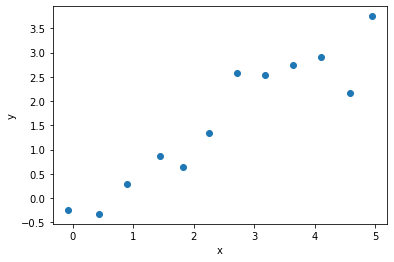

In [17]:
n = 12
d = 2

x = np.linspace(0,5,n)  + np.random.randn(n)*0.05
y = x*0.7 + np.random.randn(n)*0.5
X = x[:,None]

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y');

In [19]:
# function that I need for late
def make_plot(lr, x, y):
    grid = np.linspace(np.min(x)-0.3,np.max(x)+.3,1000)[:,None]

    plt.scatter(x, y, label="training data")
    plt.xlabel('x')
    plt.ylabel('y');
    plt.plot(grid, lr.predict(grid), 'black', label="model")
    
    yhat = lr.predict(x[:,None])
#     plt.scatter(x, yhat, label="training predictions")
    for i in range(len(y)):
        if i == 0:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red', label="residuals")
        else:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red')

    plt.legend(fontsize=12)    

## Least Squares Regression

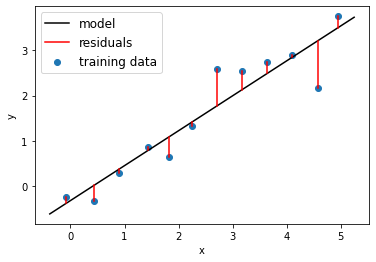

In [20]:
lr = LinearRegression()
lr.fit(X, y);
make_plot(lr, x, y)

- How is this different than PCA?

## Polynomial regression

### Non-linear regression motivation
- Linear regression might seem rather limited. 
- What if the true relationship between the target and the features is non-linear? 

- Example: $X = \begin{bmatrix}x_1\\0.86 \\ 0.02 \\ -0.42 \end{bmatrix}$ to $Z = \begin{bmatrix}x_0 & x_1 & x_1^2\\ 1 & 0.86 & 0.74\\ 1 & 0.02 & 0.0004\\ 1 & -0.42 & 0.18\\ \end{bmatrix}$

**We still use the linear regression framework, but create quadratic, cubic etc. features**

## Let's see an example

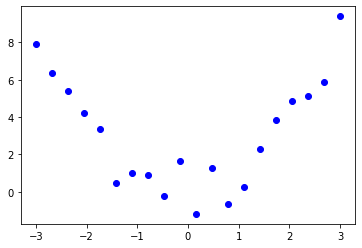

In [21]:
n = 20
X = np.linspace(-3,3,n)
y = X**2 + np.random.randn(n)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(X, y, color='blue');

## Fitting a linear regression line
(Alternative method using sklearn)

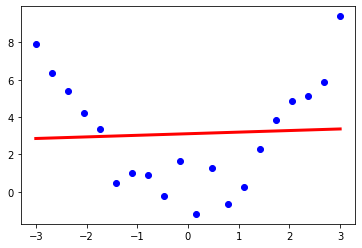

In [22]:
lr = LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='red', linewidth=3)

## Using polynomial features

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
deg = 2
poly_feats = PolynomialFeatures(degree=deg)
X_deg = poly_feats.fit_transform(X)
X_poly_feat_names = poly_feats.get_feature_names(['x'+ str(i) for i in range(1,deg)])
df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
df_poly['y'] = y
df_poly.head()

,1,x1,x1^2,y
0,1.0,-3.000000,9.000000,7.894802
1,1.0,-2.684211,7.204986,6.337724
2,1.0,-2.368421,5.609418,5.418895
3,1.0,-2.052632,4.213296,4.233076
4,1.0,-1.736842,3.016620,3.344263


## Fitting polynomial features
- Discuss overfit vs. underfit

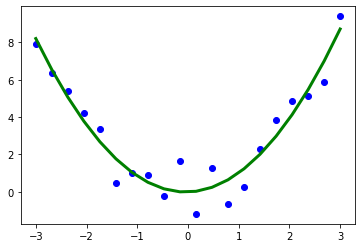

In [33]:
lr_poly = LinearRegression()
lr_poly.fit(X_deg, y)
preds = lr_poly.predict(X_deg)
plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='green', linewidth=3);

## Recap
1. Machine Learning
    - Supervised vs. Unsupervised Learning
* Supervised Learning 101
    - `X` and `y`
    - Review: Regression vs. Classification
    - The golden rule: train/test split
    - Types of errors, bias-variance tradeoff
* Linear Regression: Simple vs. Multiple Linear Regression, Polynomial Regression